In [1]:
from data_process.svhn_data import *
from data_process.mnist_data import *
from data_process.visualization import *
import matplotlib.pyplot as plt
from mcd_svhn2mnist import *

# Domain Adaptation between SVHN Data and MNIST Data using Maximum Classifier Discrepency

## Data Preparation

In [2]:
svhn_images_train, svhn_labels_train_hot, svhn_images_test, svhn_labels_test_hot = load_svhn_data(hot = True)
svhn_images_train, svhn_labels_train, svhn_images_test, svhn_labels_test = load_svhn_data(hot = False)

In [3]:
svhn_images_train_greyscale = rgb2gray(svhn_images_train).astype(np.float32)
svhn_images_test_greyscale = rgb2gray(svhn_images_test).astype(np.float32)

In [4]:
mnist_images_train, mnist_labels_train, mnist_images_test, mnist_labels_test = load_mnist_data(32)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


/home/ecbm4040/miniconda3/envs/dlenv/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ecbm4040/miniconda3/envs/dlenv/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [5]:
print(svhn_images_train.shape)
print(svhn_images_train_greyscale.shape)
print(svhn_labels_train.shape)
print(svhn_labels_train_hot.shape)
print(svhn_images_test.shape)
print(svhn_images_test_greyscale.shape)
print(svhn_labels_test.shape)
print(svhn_labels_test_hot.shape)


print(mnist_images_train.shape)
print(mnist_labels_train.shape)
print(mnist_images_test.shape)
print(mnist_labels_test.shape)



(73257, 32, 32, 3)
(73257, 32, 32, 1)
(73257,)
(73257, 10)
(26032, 32, 32, 3)
(26032, 32, 32, 1)
(26032,)
(26032, 10)
(55000, 32, 32, 1)
(55000, 10)
(10000, 32, 32, 1)
(10000, 10)


## Data Visualization

### SVHN Data

In [6]:
# Calculate the total number of images in source dataset
num_images = svhn_images_train.shape[0] + svhn_images_test.shape[0]

print("Total Number of Images", num_images)

Total Number of Images 99289


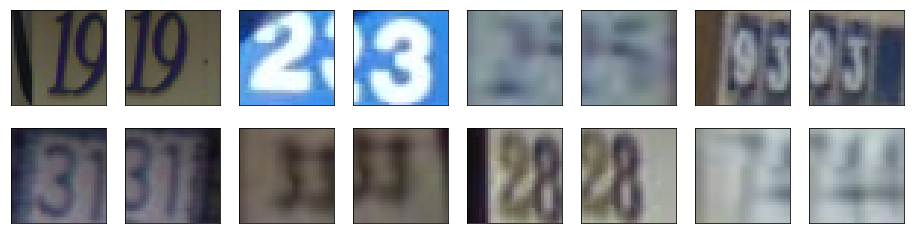

In [7]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

# plot some images in training set
plot_images(svhn_images_train, 2, 8)

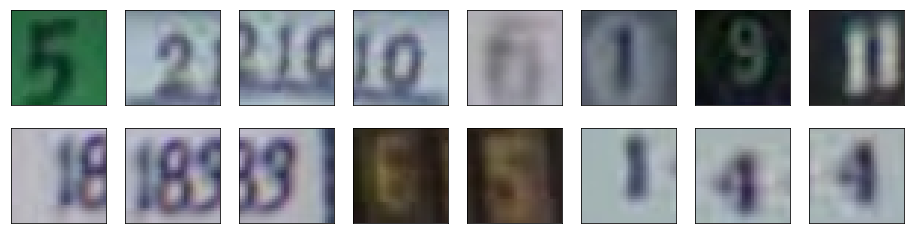

In [8]:
# plot some images in test set
plt.rcParams['figure.figsize'] = (16.0, 4.0)
plot_images(svhn_images_test, 2, 8)

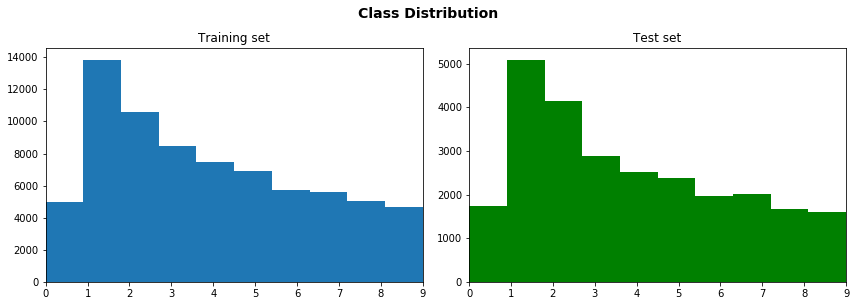

In [9]:
plt.rcParams['figure.figsize'] = (12.0, 4.0)
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(svhn_labels_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(0, 9)

ax2.hist(svhn_labels_test, color='g', bins=10)
ax2.set_title("Test set")

fig.tight_layout()

### MNIST Data

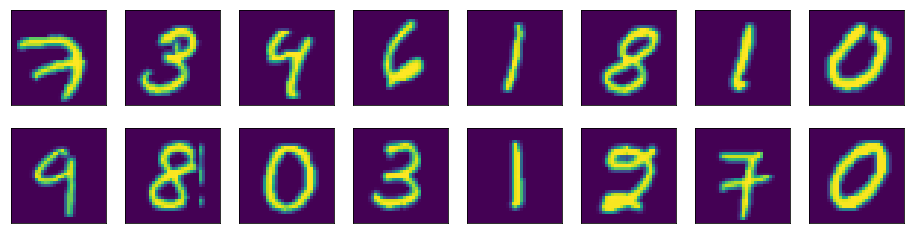

In [10]:
plt.rcParams['figure.figsize'] = (16.0, 4.0)
plot_images(mnist_images_train, 2, 8)

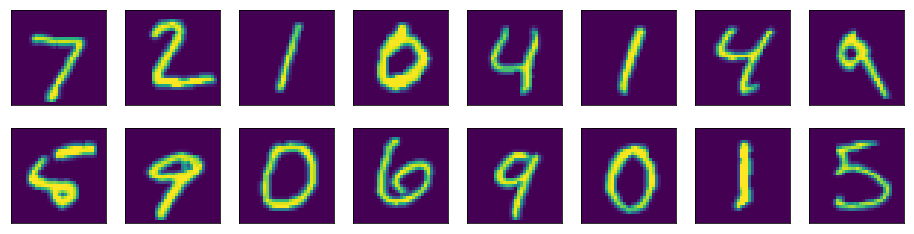

In [11]:
plt.rcParams['figure.figsize'] = (16.0, 4.0)
plot_images(mnist_images_test, 2, 8)

## Sampling Data

In [12]:
ind_1 = np.random.choice(73257, 60000, replace = False)
ind_2 = np.random.choice(16032, 5000, replace = False)

svhn_tr_im = svhn_images_train_greyscale[ind_1,:,:]
svhn_tr_im = np.reshape(svhn_tr_im, (-1, 1024))
svhn_ts_im = svhn_images_test_greyscale[ind_2,:,:]
svhn_ts_im = np.reshape(svhn_ts_im, (-1, 1024))
svhn_tr_labels = svhn_labels_train_hot[ind_1,:]
svhn_ts_labels = svhn_labels_test_hot[ind_2,:]

ind_3 = np.random.choice(55000, 20000, replace = False)
ind_4 = np.random.choice(10000, 5000, replace = False)

mnist_tr_im = mnist_images_train[ind_3,:,:]
mnist_tr_im = np.reshape(mnist_tr_im, (-1, 1024))
mnist_ts_im = mnist_images_test[ind_4,:,:]
mnist_ts_im = np.reshape(mnist_ts_im, (-1, 1024))
mnist_tr_labels = mnist_labels_train[ind_3,:]
mnist_ts_labels = mnist_labels_test[ind_4,:]


In [13]:
filter_size = 5
n_filters_1 = 64
n_filters_2 = 64
n_filters_3 = 128
n_units_g = 3072
n_units_c = 2048
#n_units_d_1 = 64
#n_units_d_2 = 64

learning_rate = 0.0002
epoch = 20
num_stepC = 4
#n_iter = 1000
batch_size = 32
show_step = 50

model_path = '/model'
#keep_prob = 0.5

is_saving = False

 

In [ ]:
mcd = MCD_DA()
mcd.train(images_train_1=svhn_tr_im, labels_train_1=svhn_tr_labels, \
          images_test_1=svhn_ts_im, labels_test_1=svhn_ts_labels, \
          images_train_t=mnist_tr_im, labels_train_t=mnist_tr_labels, \
          images_test_t=mnist_ts_im, labels_test_t=mnist_ts_labels, \
          filter_size=filter_size, n_filters_1=n_filters_1, n_filters_2=n_filters_2, n_filters_3 = n_filters_3, \
          n_units_g=n_units_g, n_units_c = n_units_c, \
          learning_rate = learning_rate, epoch = epoch, num_stepC = num_stepC, \
          batch_size = batch_size, show_step = show_step, \
          is_saving = is_saving, model_path = model_path)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

number of batches for training: 625
epoch 1 
---------------
Iteration: 0, Loss_test_a: 4.678677014160156, Loss_test_b: 4.642315850067138, Loss_test_c: 0.033218956664204595
Source test acc1: 10.155%, Source test acc2: 10.08%.
Best test accuracy classifier1! Iteration:0 accuracy: 8.34%
Best test accuracy classifier2! Iteration:0 accuracy: 10.115%
---------------
Iteration: 50, Loss_test_a: 4.447658432006836, Loss_test_b: 4.429237175750733, Loss_test_c: 0.023332034736871718
Source test acc1: 19.384999999999998%, Source test acc2: 19.36%.
Best test accuracy classifier1! Iteration:50 accuracy: 15.875%
Best test accuracy classifier2! Iteration:50 accuracy: 14.865%
---------------
Iteration: 100, Loss_test_a: 4.228044401168823, Loss_test_b: 4.206353625869751, Loss_test_c: 0.022825743663311006
Source tes

---------------
Iteration: 1350, Loss_test_a: 1.1723696207523346, Loss_test_b: 1.1638885084629058, Loss_test_c: 0.012062666105479002
Source test acc1: 82.365%, Source test acc2: 82.525%.
Best test accuracy classifier1! Iteration:1350 accuracy: 71.06%
---------------
Iteration: 1400, Loss_test_a: 1.1513640183925629, Loss_test_b: 1.137093147945404, Loss_test_c: 0.011686497127264737
Source test acc1: 82.3%, Source test acc2: 82.565%.
---------------
Iteration: 1450, Loss_test_a: 1.141468939447403, Loss_test_b: 1.1267555222511292, Loss_test_c: 0.011429178979247808
Source test acc1: 82.715%, Source test acc2: 82.765%.
---------------
Iteration: 1500, Loss_test_a: 1.1669290839672088, Loss_test_b: 1.1567016938686372, Loss_test_c: 0.01121257907897234
Source test acc1: 82.27%, Source test acc2: 82.39%.
Best test accuracy classifier1! Iteration:1500 accuracy: 71.395%
---------------
Iteration: 1550, Loss_test_a: 1.1941816137313843, Loss_test_b: 1.1805892531871796, Loss_test_c: 0.0111899028405547

---------------
Iteration: 3000, Loss_test_a: 0.9569439840316772, Loss_test_b: 0.9528132922172546, Loss_test_c: 0.008219202990084886
Source test acc1: 85.405%, Source test acc2: 85.56%.
Best test accuracy classifier2! Iteration:3000 accuracy: 77.51%
---------------
Iteration: 3050, Loss_test_a: 0.9471912539720535, Loss_test_b: 0.9356546441793442, Loss_test_c: 0.008232386542856693
Source test acc1: 85.75500000000001%, Source test acc2: 85.75%.
Best test accuracy classifier1! Iteration:3050 accuracy: 77.75%
Best test accuracy classifier2! Iteration:3050 accuracy: 78.11%
---------------
Iteration: 3100, Loss_test_a: 0.9316025351762771, Loss_test_b: 0.9286749349355697, Loss_test_c: 0.008363088361546396
Source test acc1: 85.94000000000001%, Source test acc2: 85.76%.
Best test accuracy classifier1! Iteration:3100 accuracy: 78.03999999999999%
Best test accuracy classifier2! Iteration:3100 accuracy: 78.24%
epoch 6 
---------------
Iteration: 3125, Loss_test_a: 0.9807786551952362, Loss_test_b: 

---------------
Iteration: 4775, Loss_test_a: 0.8916451018333436, Loss_test_b: 0.8865749052762986, Loss_test_c: 0.006849642444029451
Source test acc1: 86.695%, Source test acc2: 86.41499999999999%.
---------------
Iteration: 4825, Loss_test_a: 0.9188131168842316, Loss_test_b: 0.9167994354009629, Loss_test_c: 0.006520016923174262
Source test acc1: 85.82499999999999%, Source test acc2: 85.905%.
---------------
Iteration: 4875, Loss_test_a: 0.84066257417202, Loss_test_b: 0.8349549552440644, Loss_test_c: 0.006234466552361846
Source test acc1: 87.495%, Source test acc2: 87.375%.
Best test accuracy classifier1! Iteration:4875 accuracy: 81.625%
---------------
Iteration: 4925, Loss_test_a: 0.8660765193939209, Loss_test_b: 0.8586495647668838, Loss_test_c: 0.006390542105957866
Source test acc1: 87.09%, Source test acc2: 87.21%.
---------------
Iteration: 4975, Loss_test_a: 0.8385688020467759, Loss_test_b: 0.8296794659614563, Loss_test_c: 0.006308913718163967
Source test acc1: 87.285%, Source te

---------------
Iteration: 6550, Loss_test_a: 0.7855354421257973, Loss_test_b: 0.7825619015455246, Loss_test_c: 0.005423451341502368
Source test acc1: 88.515%, Source test acc2: 88.35499999999999%.
Best test accuracy classifier2! Iteration:6550 accuracy: 83.17%
---------------
Iteration: 6600, Loss_test_a: 0.7716380660057068, Loss_test_b: 0.7660883564114571, Loss_test_c: 0.005564727893285454
Source test acc1: 88.3%, Source test acc2: 88.57000000000001%.
---------------
Iteration: 6650, Loss_test_a: 0.7817049728631973, Loss_test_b: 0.7740609017729759, Loss_test_c: 0.005448902459256351
Source test acc1: 88.41499999999999%, Source test acc2: 88.295%.
Best test accuracy classifier1! Iteration:6650 accuracy: 83.165%
Best test accuracy classifier2! Iteration:6650 accuracy: 83.19%
---------------
Iteration: 6700, Loss_test_a: 0.7975076167225837, Loss_test_b: 0.7902727926492691, Loss_test_c: 0.00547785223685205
Source test acc1: 88.325%, Source test acc2: 88.24%.
---------------
Iteration: 675